# LMStudio Gemma 3 + LangChain 튜토리얼

이 노트북은 [langchain-kr](https://github.com/teddylee777/langchain-kr/)의 OpenAI 예제를 LMStudio의 Gemma 3 모델용으로 수정한 것입니다.

## 사전 준비사항
1. LMStudio 실행
2. Gemma 3 모델 로드
3. Local Server 시작 (포트: 1234)

![alt text](image.png)

## 1. 환경 설정 및 패키지 임포트

In [7]:
# 패키지 임포트
from langchain_openai import OpenAI, ChatOpenAI
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.schema import HumanMessage, SystemMessage
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import os

# LMStudio 서버 설정
# LMSTUDIO_BASE_URL = "http://localhost:1234/v1"
# LMSTUDIO_BASE_URL = "http://172.16.2.144:1234/v1"
LMSTUDIO_BASE_URL = "http://127.0.0.1:1234/v1"
LMSTUDIO_API_KEY = "not-needed"  # LMStudio는 API 키가 필요없음
MODEL_NAME = "exaone-4.0-1.2b"
# MODEL_NAME = "gemma-3-27b"  # LMStudio에 로드된 모델 이름

print("설정 완료!")

설정 완료!


## 2. 기본 LLM 사용법

In [8]:
# LMStudio용 OpenAI 호환 LLM 생성
# 객체 생성
llm = ChatOpenAI(
    base_url=LMSTUDIO_BASE_URL,
    api_key=LMSTUDIO_API_KEY,
    model=MODEL_NAME,
    temperature=0.1,  # 창의성 수준 (0.0 ~ 1.0)
    max_tokens=4096,
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [9]:
response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 20, 'total_tokens': 28, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'exaone-4.0-1.2b', 'system_fingerprint': 'exaone-4.0-1.2b', 'id': 'chatcmpl-xn89dh9occvuxac88bsco', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--560a8da6-79e7-4650-b7dd-da77c8d13862-0', usage_metadata={'input_tokens': 20, 'output_tokens': 8, 'total_tokens': 28, 'input_token_details': {}, 'output_token_details': {}})

In [10]:
response.content

'대한민국의 수도는 서울입니다.'

In [11]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 20,
  'total_tokens': 28,
  'completion_tokens_details': None,
  'prompt_tokens_details': None},
 'model_name': 'exaone-4.0-1.2b',
 'system_fingerprint': 'exaone-4.0-1.2b',
 'id': 'chatcmpl-xn89dh9occvuxac88bsco',
 'service_tier': None,
 'finish_reason': 'stop',
 'logprobs': None}

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [12]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [8]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
# answer가 저장되지는 않음

for token in answer:

    print(token.content, end="", flush=True)

## 대한민국 아름다운 관광지 10곳 (주소 포함)

대한민국에는 아름다운 관광지가 정말 많습니다. 그 중에서도 대표적인 곳 10곳을 선정하여 소개합니다.

**1. 제주도 성산일출봉:**

*   **주소:** 제주특별자치도 제주시 성산읍 성산리
*   **특징:** 유네스코 세계자연유산으로 지정된 화산섬, 아름다운 일출과 함께 멋진 풍경을 자랑합니다.
*   **추천 활동:** 정상 등반, 주변 해안 산책, 성산일출봉 박물관 방문

**2. 부산 해운대해수욕장:**

*   **주소:** 부산광역시 해운대구 해운대로 264
*   **특징:** 대한민국 대표 해변, 여름철 피서객들에게 인기 있으며 주변에 다양한 편의시설과 볼거리가 있습니다.
*   **추천 활동:** 해수욕, 산책, 해운대 시장 방문, 동백섬 누리마루 APEC 하우스 관람

**3. 전주 한옥마을:**

*   **주소:** 전라북도 전주시 완산구 풍남동3가
*   **특징:** 전통 한옥이 잘 보존된 마을, 다양한 먹거리와 볼거리가 있어 한국의 전통 문화를 체험할 수 있습니다.
*   **추천 활동:** 한복 대여 후 사진 촬영, 전주비빔밥 맛집 방문, 경기전 관람

**4. 경주 불국사:**

*   **주소:** 경상북도 경주시 불국로 382
*   **특징:** 유네스코 세계문화유산으로 지정된 신라 시대의 대표적인 사찰, 아름다운 건축미와 역사적 가치를 지니고 있습니다.
*   **추천 활동:** 다보탑과 석가탑 관람, 청운교와 백운교 건너기, 불국사 박물관 방문

**5. 강원도 설악산 국립공원:**

*   **주소:** 강원도 속초시 설악산로
*   **특징:** 아름다운 자연 경관을 자랑하는 국립공원, 다양한 등산 코스와 계곡이 있어 사계절 내내 즐길 수 있습니다.
*   **추천 활동:** 울산바위 등반, 권금성 케이블카 탑승, 신흥사 방문

**6. 담양 죽녹원:**

*   **주소:** 전라남도 담양군 담양읍 죽녹원길 180
*   **특징:** 대나무 숲이 울창한 아

In [23]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)

## 대한민국 아름다운 관광지 10곳 (주소 포함)

1.  **제주도 성산일출봉:**
    *   주소: 제주특별자치도 서귀포시 성산읍 성산리 1
    *   설명: 유네스코 세계자연유산으로 지정된 아름다운 오름입니다. 정상에서 바라보는 일출은 장관이며, 주변 해안 경관 또한 빼어나 많은 관광객이 찾는 명소입니다.

2.  **부산 해운대해수욕장:**
    *   주소: 부산광역시 해운대구 해운대로 289
    *   설명: 대한민국 대표적인 해수욕장으로, 여름철 피서지로 유명합니다. 넓은 백사장과 푸른 바다, 주변 편의시설이 잘 갖춰져 있어 즐거운 시간을 보낼 수 있습니다.

3.  **전주 한옥마을:**
    *   주소: 전라북도 전주시 완산구 풍남동3가 74-1
    *   설명: 전통 한옥이 잘 보존된 마을로, 한국의 전통 문화를 체험할 수 있는 곳입니다. 한복 대여 후 골목길을 거닐며 사진을 찍거나, 다양한 먹거리를 즐길 수 있습니다.

4.  **경주 불국사:**
    *   주소: 경상북도 경주시 불국로 385
    *   설명: 신라 시대 대표적인 사찰로, 유네스코 세계문화유산으로 지정되었습니다. 아름다운 건축물과 역사적 가치를 느낄 수 있으며, 주변의 다보탑과 석가탑은 빼놓을 수 없는 볼거리입니다.

5.  **강원도 설악산 국립공원:**
    *   주소: 강원도 속초시 설악산로 1234
    *   설명: 사계절 아름다운 풍경을 자랑하는 국립공원입니다. 가을 단풍, 겨울 설경 등 다양한 매력을 느낄 수 있으며, 케이블카를 이용해 쉽게 정상에 오를 수 있습니다.

6.  **담양 죽녹원:**
    *   주소: 전라남도 담양군 담양읍 봉안리 132-1
    *   설명: 울창한 대나무 숲길을 거닐며 자연의 아름다움을 만끽할 수 있는 곳입니다. 시원한 바람과 함께 힐링하는 시간을 보낼 수 있으며, 주변에 다양한 먹거리와 볼거리가 있습니다.

7.  **순천만 습지:**
    *   주소: 전라남도 순천시 순천만길 24

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4.1` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [ ]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    base_url=LMSTUDIO_BASE_URL,
    api_key=LMSTUDIO_API_KEY,
    model=MODEL_NAME,
    temperature=0.1,  # 창의성 수준 (0.0 ~ 1.0)
    max_tokens=4096,
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


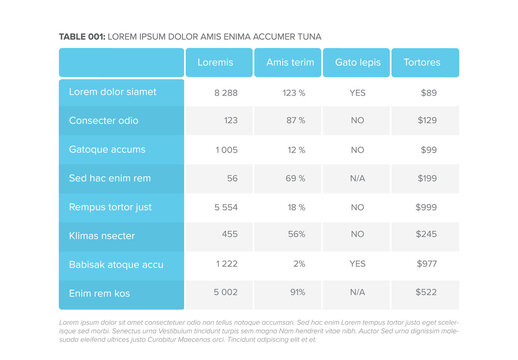

Okay, let's break down this image!

**Overall Description:**

The image presents a data table labeled "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA". It appears to be a summary of some kind of performance or characteristic data for six different items (labeled as "Lorem dolor siamet", "Consecter odio" etc.). The table uses placeholder text ("lorem ipsum") throughout, suggesting it's likely a template or example rather than real-world data.

**Table Structure & Columns:**

The table has 6 rows and 4 columns:

1.  **Item Name (First Column):** This column lists the names of the items being compared. The names are all in "Lorem ipsum" format, indicating they're just dummy text.
2.  **Lorems:** This column contains numerical values, likely representing a quantity or count associated with each item. These range from 56 to 8288.
3.  **Amis terim:** This column shows percentage values (e.g., "12%", "87%"). It could represent a rate, proportion, or some other metric expressed as a perc

In [28]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


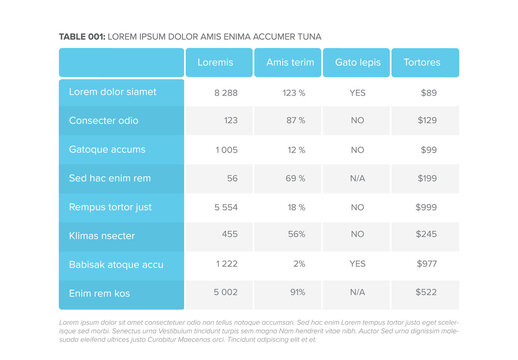

이미지에는 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"라는 제목의 표가 있습니다. 이 표는 다음과 같은 정보를 담고 있습니다:

*   **행 (Row):** Lorem dolor siamet, Consecter odio, Gatoque accums, Sed hac enim rem, Rempus tortor just, Klimas nsecter, Babisak atoque accu, Enem rem kos
*   **열 (Column):** Loremls, Amis terim, Gato lepis, Tortores
    *   Loremls: 숫자 값 (8288, 123, 1005, 56, 5554, 455, 1222, 5002)
    *   Amis terim: 백분율 값 (123%, 87%, 12%, 69%, 18%, 56%, 2%, 91%)
    *   Gato lepis: YES/NO/N/A 값 (YES, NO, NO, N/A, NO, NO, YES, N/A)
    *   Tortores: 금액 값 ($89, $129, $99, $199, $999, $245, $977, $522)

표 아래에는 더미 텍스트 ("Lorem ipsum...")가 있습니다.

In [29]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지에 대한 구체적인 질문 텍스트 프롬프트
text_prompt = "이 이미지안에 내용을 한글로 설명해줘."

# 이미지 파일과 텍스트 프롬프트를 함께 전달하여 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_URL, user_prompt=text_prompt)
stream_response(answer)

## System, User 프롬프트 수정

In [30]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


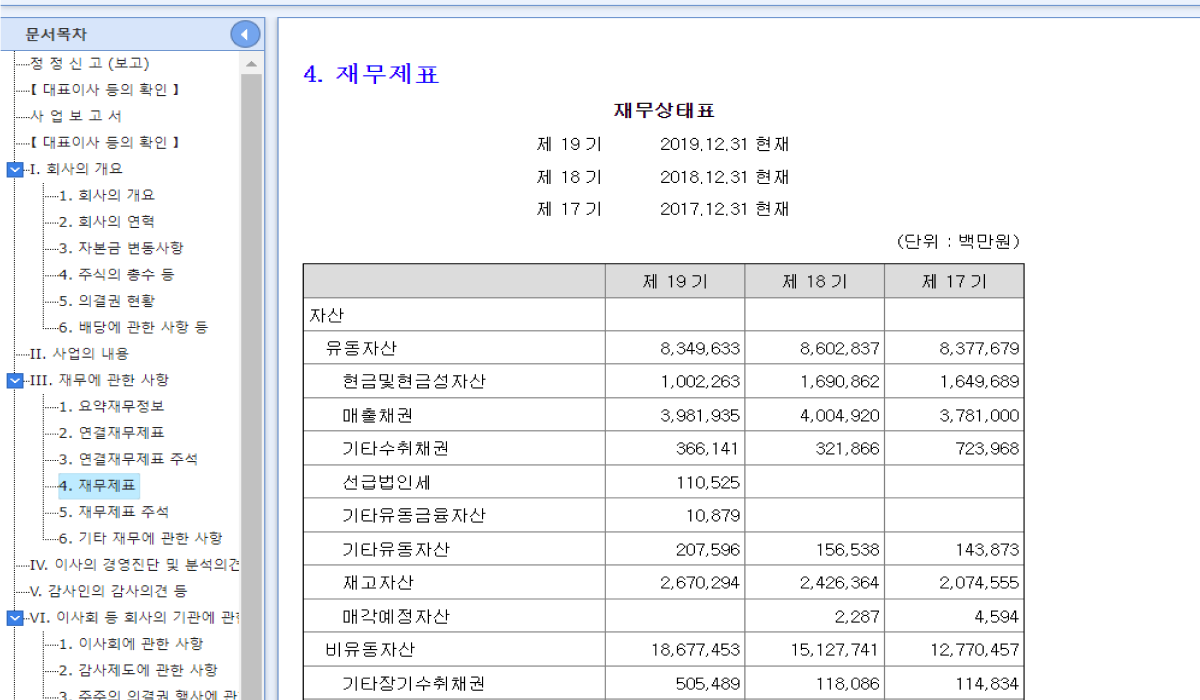

## 재무제표 분석 결과 (2019년 vs 2018년 vs 2017년)

주어진 재무제표를 바탕으로 다음과 같은 흥미로운 사실들을 발견했습니다.

**1. 꾸준한 매출 성장:**

*   **류품자산:** 2017년부터 2019년까지 지속적으로 증가하여, 2019년에 83억 4,963만 원으로 가장 높은 수치를 기록했습니다. 이는 회사의 전반적인 사업 규모가 확대되고 있음을 보여줍니다.
*   **매출액:** 2017년 3조 7,810만 원에서 2019년 3조 9,619억 원으로 증가하며 꾸준한 성장세를 유지하고 있습니다.

**2. 주요 자산 변화:**

*   **현금 및 현금성자산:** 2018년에 비해 2019년에 감소했습니다 (2018년 1조 6,900만 원 → 2019년 1조 200만 원). 이는 사업 확장에 따른 투자 증가 또는 운영 자금 사용 때문일 수 있습니다.
*   **기타유동자산:** 2017년에 비해 2019년에 크게 증가했습니다 (2017년 1억 4,383만 원 → 2019년 2억 7,596만 원).

**3. 부채 및 자본 구조:**

*   **제고자산:** 2017년부터 2019년까지 꾸준히 증가하여 2019년에 1조 8,677억 원으로 가장 높은 수치를 기록했습니다.
*   **기타유동부채:** 2018년에 비해 2019년에 감소했습니다 (2018년 1억 1,806만 원 → 2019년 4,594만 원).

**4. 전반적인 성장 추세:**

*   대체적으로 자산 규모가 확대되고 있으며, 매출액 또한 꾸준히 증가하고 있습니다. 이는 회사가 안정적인 성장세를 보이고 있음을 시사합니다.

**추가 분석 제안:**

*   현금 및 현금성자산 감소 원인과 영향에 대한 추가적인 정보 확인이 필요합니다.
*   기타유동자산의 구성 내역을 파악하여 증가 요인을 분석해야 합니다.
*   부채 비율 변화 추이를 살펴보고 재무 안정성을 평가하는 것이 좋습니다.

궁금한 점이나 더 자세한 분석을 원하시면 언제든지 말씀해주세요.

In [31]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)